In [3]:
## Full backend analysis for the CREEDS and L1000 dataset 
import os
import pandas as pd
from pandas.compat import StringIO
import numpy as np
from numpy import loadtxt
import sys
import json
from pprint import pprint
import objectpath
import csv
import re
import matplotlib.pyplot as plt
import json, requests
from pprint import pprint
import itertools
import scipy
from scipy.spatial import distance
from sklearn.metrics.pairwise import pairwise_distances
from clustergrammer_widget import *
import seaborn as sns
def get_geneset(df, indexer):
    df_ = df.loc[indexer, :]
    return list(df_[df_ == 1].index)

In [ ]:
process2 = pd.read_csv("total_overlap.tsv", sep='\t', names = ['creeds_cell_type',
 'creeds_disease_name',
 'creeds_do_id',
 'creeds_genes_direction',
 'creeds_geo_id',
 'creeds_id',
 'creeds_organism',
 'l1000_cell_id',
 'l1000_genes_direction',
 'l1000_pert_desc',
 'l1000_pert_dose',
 'l1000_pert_id',
 'l1000_pert_time',
 'l1000_rid',
 'l1000_sig_id',
 'oddsratio',
 'overlap',
 'pvalue'], header = None)

In [ ]:
def try_float_or_na(s):
    try:
        return float(s)
    except:
        return float('nan')
process2['pvalue'] = process2['pvalue'].map(try_float_or_na)

In [42]:
process2.pivot_table(columns=['l1000_pert_desc'])

l1000_pert_desc,Cabergoline,Clofarabine,DIAZEPAM,Digoxin,Milrinone,Nadolol,Naproxen,TAMOXIFEN,Taxol,fulvestrant,metformin,sirolimus,sorafenib,tretinoin,triamterene,vorinostat
l1000_pert_dose,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.486140,10.000000,4.496000,4.375000,3.322667,5.546875,3.673846,10.000000,4.558256
l1000_pert_time,24.000000,15.000000,6.000000,13.200000,6.000000,24.000000,24.000000,6.000000,19.500000,15.000000,6.000000,15.600000,12.000000,15.692308,15.000000,14.928006
oddsratio,2.832119,2.831804,2.811235,2.880633,2.782396,2.851356,2.951258,2.871492,2.709575,2.834031,2.851222,2.899206,2.860673,2.851635,2.784197,2.790096
pvalue,0.186032,0.202378,0.180513,0.192339,0.180822,0.176509,0.174809,0.180094,0.191231,0.181929,0.173658,0.177017,0.183573,0.185988,0.184490,0.190631


In [ ]:
process3 = process2.pivot_table(
    columns=['l1000_pert_desc', 'l1000_genes_direction'],
    index=['creeds_disease_name', 'creeds_genes_direction'],
    values='pvalue',
    aggfunc='mean',
)

In [16]:
process3.columns = ['_'.join(col).strip() for col in process3.columns.values]
process3.index = ['_'.join(ind).strip() for ind in process3.index.values]

In [17]:
process3.head()

,AMLODIPINE BESYLATE_down,AMLODIPINE BESYLATE_up,ATRA_down,ATRA_up,Amlodipine_down,Amlodipine_up,Aripiprazole_down,Aripiprazole_up,Azathioprine_down,Azathioprine_up,...,vinorelbine_down,vinorelbine_up,voriconazole_down,voriconazole_up,vorinostat_down,vorinostat_up,warfarin_down,warfarin_up,zolpidem_down,zolpidem_up
APECED - Autoimmune polyendocrinopathy-candidiasis-ectodermal dystrophy_down,0.125480,0.204159,0.070621,0.100465,0.125480,0.204159,0.001504,0.286292,0.061477,0.140086,...,0.512608,0.002923,0.006525,0.018262,0.160999,0.038356,0.357694,0.042395,0.010423,0.147124
APECED - Autoimmune polyendocrinopathy-candidiasis-ectodermal dystrophy_up,0.214672,0.106481,0.184230,0.273122,0.214672,0.106481,0.052672,0.164691,0.137270,0.226177,...,0.202613,0.183170,0.048656,0.334395,0.355294,0.070095,0.089927,0.181661,0.347183,0.365192
Acute Lung Injury_down,0.119084,0.093620,0.073525,0.108027,0.119084,0.093620,0.023995,0.108299,0.164369,0.105815,...,0.025083,0.098338,0.049389,0.034340,0.172667,0.073459,0.190930,0.276999,0.079418,0.031912
Acute Lung Injury_up,0.133285,0.151126,0.116405,0.072586,0.133285,0.151126,0.099044,0.075981,0.064232,0.157564,...,0.122404,0.111453,0.000535,0.022459,0.158063,0.037744,0.094075,0.041698,0.063502,0.064252
Acute arthritis_down,0.595164,0.323266,0.360164,0.486690,0.595164,0.323266,0.652078,0.265884,0.452925,0.324834,...,0.303644,0.507253,0.753023,0.240134,0.515654,0.346114,0.373219,0.227613,0.686202,0.484082


In [ ]:
process3.to_csv("Total_multicol_combined_l1000_creeds.tsv", sep = "\t" )

In [19]:

## clustergrammer implementation
# load data into new network instance and cluster
net = Network(clustergrammer_widget)

net.load_file("combined_l1000_creeds.tsv")
net.cluster()

# view the results as a widget
net.widget()

/Users/maayanlab/anaconda3/lib/python3.7/site-packages/clustergrammer_widget/clustergrammer/load_data.py:70: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  tmp_df['mat'] = pd.read_table(file_buffer, index_col=row_arr)


clustergrammer_widget(network='{"row_nodes": [{"name": "APECED - Autoimmune polyendocrinopathy-candidiasis-ect…

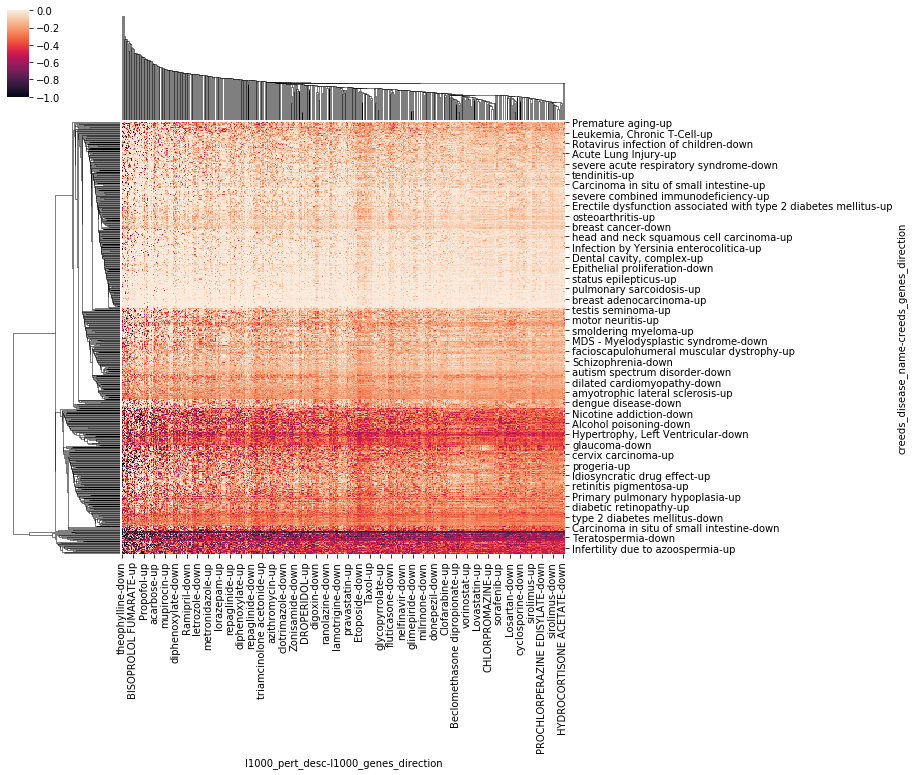

In [4]:
sns.clustermap(-process2.pivot_table(
    columns=['l1000_pert_desc', 'l1000_genes_direction'],
    index=['creeds_disease_name', 'creeds_genes_direction'],
    values='pvalue',
    aggfunc='mean',
).fillna(1))

In [1]:
process4 = -process2[((process2['creeds_genes_direction'] == 'up') & (process2['l1000_genes_direction'] == 'up'))].pivot_table(
    columns=['l1000_pert_desc', 'l1000_genes_direction'],
    index=['creeds_disease_name', 'creeds_genes_direction'],
    values='pvalue',
    aggfunc='mean',
)

NameError: name 'process2' is not defined

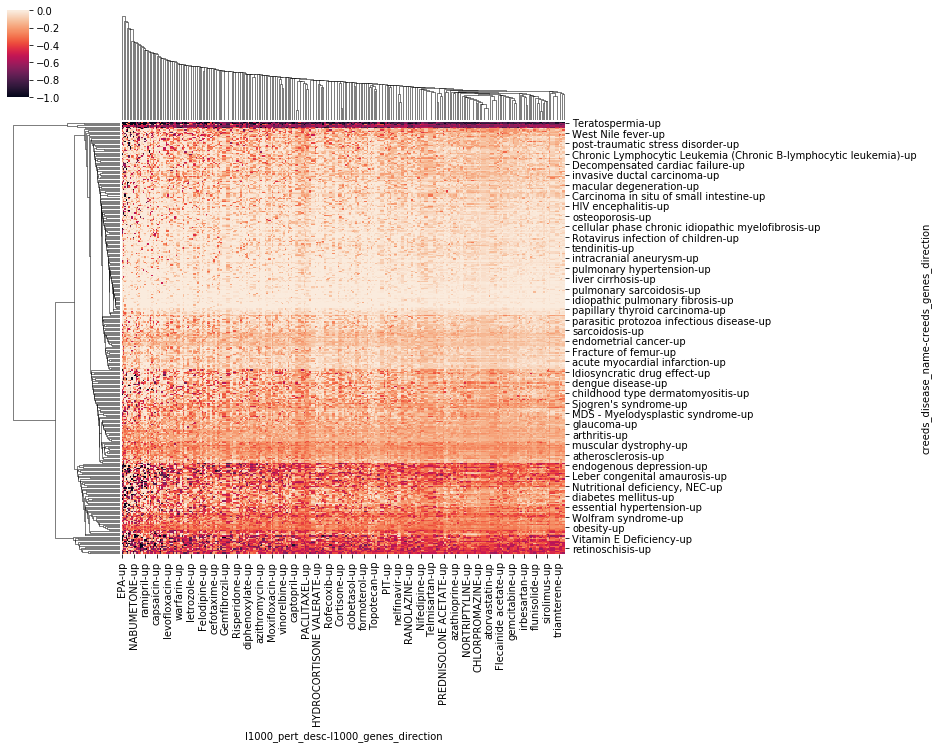

In [5]:
sns.clustermap(-process2[((process2['creeds_genes_direction'] == 'up') & (process2['l1000_genes_direction'] == 'up'))].pivot_table(
    columns=['l1000_pert_desc', 'l1000_genes_direction'],
    index=['creeds_disease_name', 'creeds_genes_direction'],
    values='pvalue',
    aggfunc='mean',
).fillna(1))

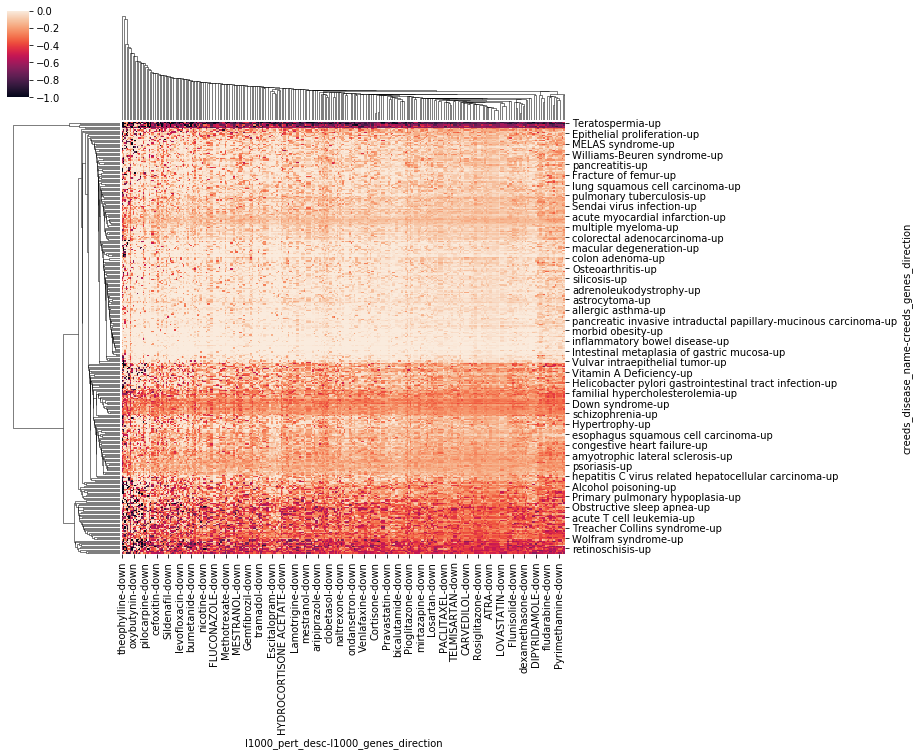

In [6]:
sns.clustermap(-process2[((process2['creeds_genes_direction'] == 'up') & (process2['l1000_genes_direction'] == 'down'))].pivot_table(
    columns=['l1000_pert_desc', 'l1000_genes_direction'],
    index=['creeds_disease_name', 'creeds_genes_direction'],
    values='pvalue',
    aggfunc='mean',
).fillna(1))

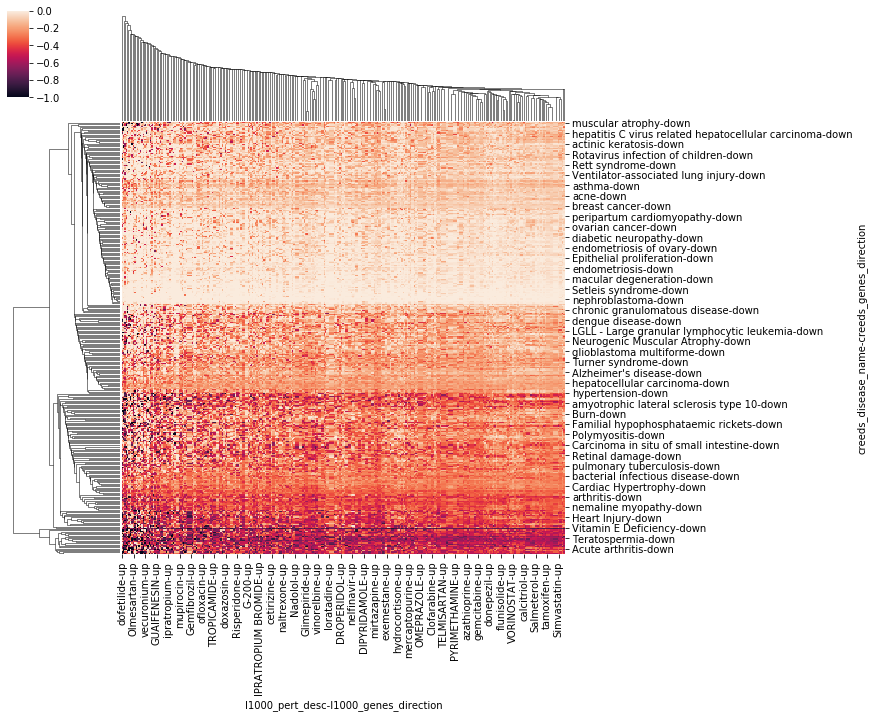

In [7]:
sns.clustermap(-process2[((process2['creeds_genes_direction'] == 'down') & (process2['l1000_genes_direction'] == 'up'))].pivot_table(
    columns=['l1000_pert_desc', 'l1000_genes_direction'],
    index=['creeds_disease_name', 'creeds_genes_direction'],
    values='pvalue',
    aggfunc='mean',
).fillna(1))

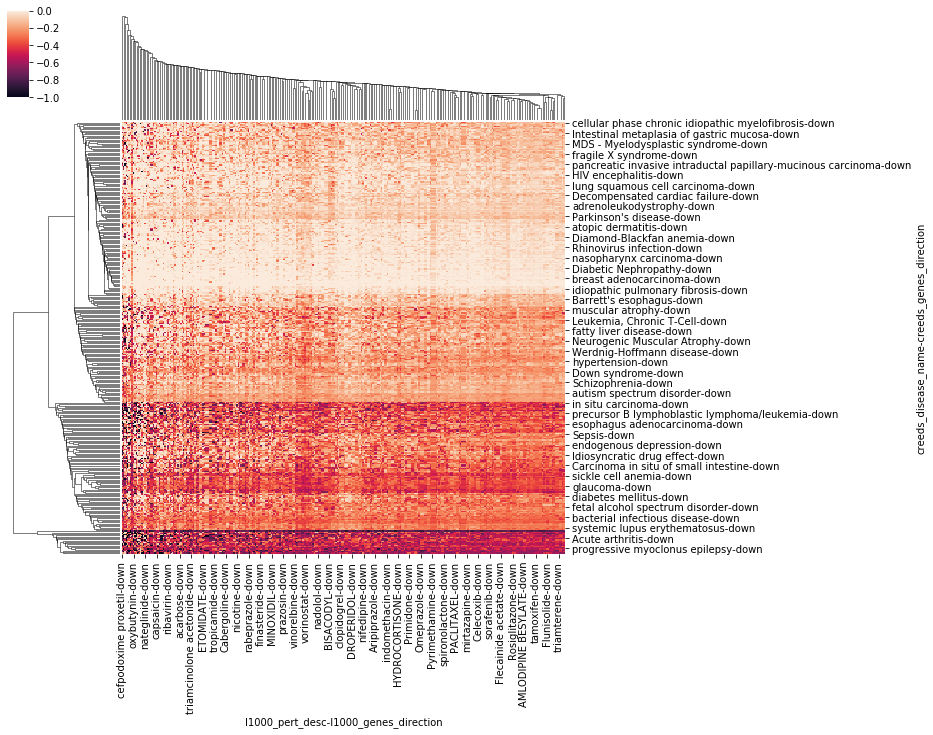

In [8]:
sns.clustermap(-process2[((process2['creeds_genes_direction'] == 'down') & (process2['l1000_genes_direction'] == 'down'))].pivot_table(
    columns=['l1000_pert_desc', 'l1000_genes_direction'],
    index=['creeds_disease_name', 'creeds_genes_direction'],
    values='pvalue',
    aggfunc='mean',
).fillna(1))

In [31]:
process2['creeds_id'].unique().shape

(828,)

In [32]:
1243 * 828 * 4

4116816

In [2]:
## load in the pre-formed datasets from the L1000_Analysis and CREEDS_Analysis files.
## THIS TAKES A WHILE TO LOAD, SO ONLY LOAD THIS ONCE AND EARLY

# L1000 up and down gene loads for drug signatures
L1000_up_genes = pd.read_csv("L1000_up_genes.csv")
L1000_down_genes = pd.read_csv("L1000_down_genes.csv")

# CREEDS up and down genes for disease signatures
with open("disease_signatures-v1.0.json") as f:
    CREEDS_data = json.load(f)

# generate the up and down gene signatures
#CREEDS_up_genes = {
#    row['do_id']: row['up_genes']
#    for row in CREEDS_data
#}
#CREEDS_down_genes = {
#    row['do_id']: row['down_genes']
#    for row in CREEDS_data
#}

# RETURNS THE do_id, geo_id, and disease name in a dictionary
CREEDS_GSE = {
    row['id']: [row['geo_id'], row["disease_name"]]
    for row in CREEDS_data
}

# load in the EMR Data (filtered > 200 in R code [Drug_diagnosis_test_code.R])
EMR_data = pd.read_csv("EMR_greater_200.csv")
## subset EMR data by the DOI and/or DrOI
EMR_data_df = pd.DataFrame(EMR_data)
#EMR_data
EMR_data_df.drop(EMR_data_df.columns[[0]], axis = 1, inplace = True) # remove the unecessary columns
#EMR_data_df

# implement the search from ICD9-do_id from the manual conversion
icd9_to_doid = pd.read_csv("ICD9_CREEDS_conversion.csv")
icd9_to_doid = pd.DataFrame(icd9_to_doid) # convert it to a data fram to drop unecessary rows
#icd9_to_doid # sanity check
icd9_to_doid_final = icd9_to_doid.drop(icd9_to_doid.columns[[0, 6, 7, 8, 9, 10, 11, 12, 13, 14]], axis = 1)
#icd9_to_doid_final # sanity check


posssible_disease_list = set(icd9_to_doid_final.Disease) 
#& set(EMR_data_df.Description) # will return {"Alzheimer's disease", "Barrett's esophagus", 'Dehydration', 'Sepsis'}

posssible_disease_list = list(posssible_disease_list) # this will be what the dropdown should display

In [3]:
###### GENERATE THE FULL ANALYSIS BETWEEN CREEDS AND L1000 GIVEN A DISEASE OF INTEREST

# USER INPUT
####
DOI = "asthma" # disease of interest. CAN TAKE FROM posssible_disease_list FOR NOW
####
#possible_diseases = EMR_data_df["Description"] #possible diseases from the Sinai EMR

### DISEASE --> ICD9 --> DOI
# get the ICD9 from the DOI
DOI_ICD9 = icd9_to_doid_final[icd9_to_doid_final.Disease.apply(lambda s: bool(re.compile(DOI, re.IGNORECASE).search(s)))]
DOI_ICD9_codes = DOI_ICD9.ICD9

# get the do_id from the DOI
DOI_DOID_codes = DOI_ICD9.DOID

# get the do_id from the DOI
DOI_CREEDS_codes = DOI_ICD9.CREEDS_drug_id

# INPUT SIMILAR CREEDS CODE FROFM THE DRUG_QUERY

#DOIDs_up = {
#    doid: geneset
#    for doid, geneset in CREEDS_up_genes.items()
#    if doid in set(DOI_DOID_codes)
#}

#DOIDs_down = {
#    doid: geneset
#    for doid, geneset in CREEDS_down_genes.items()
#    if doid in set(DOI_DOID_codes)
#}
    
##filter by DOI. Need to convert DOI to ICD9 first.
icd9_to_doid_final_search = icd9_to_doid_final[icd9_to_doid_final["Disease"].apply(lambda s: bool(re.compile(DOI, re.IGNORECASE).search(s)))]
icd9_to_doid_final_search1 = icd9_to_doid_final_search["ICD9"]

## rebuild the wildcard dataframe
icd9_wildcard = pd.DataFrame(icd9_to_doid_final_search1, columns=['ICD9'])
icd9_wildcard['ICD9_wildcard'] = icd9_wildcard['ICD9'].apply(lambda code: str(code).split('.')[0])
icd9_wildcard.head()

icd9_to_doid_final['ICD9_wildcard'] = icd9_to_doid_final['ICD9'].apply(lambda code: str(code).split('.')[0])
#icd9_to_doid_final.head()
ICD9_df_joined = pd.merge(
    left=icd9_wildcard, left_on='ICD9_wildcard',
    right=icd9_to_doid_final, right_on='ICD9_wildcard',
    how='inner',
    suffixes=(
        '_Manual',
        '_right',
    )
)


#ICD9_codes = str(int(ICD9_df_joined["ICD9_wildcard"].unique())) 
## generate an emr based on the ICD_9 codes extracted; can now extract the drug names as well
#emr_sub = EMR_data_df[EMR_data_df['ICD9'].apply(lambda s: bool(re.compile(ICD9_codes, re.IGNORECASE).search(s)))]
emr_sub = EMR_data_df[EMR_data_df["Description"].apply(lambda s: bool(re.compile(str(DOI), re.IGNORECASE).search(str(s))))]
#emr_sub[0:10]
emr_sub.reset_index(drop = True, inplace = True)

emr_sub = []
for a in ICD9_df_joined.ICD9_wildcard.unique():
    emr_sub1 = EMR_data_df[EMR_data_df["ICD9"].apply(lambda s: bool(re.compile(str(a), re.IGNORECASE).search(str(s))))]
    emr_sub.append(emr_sub1)
emr_sub_df = pd.concat(emr_sub)
#### L1000 integration
# disease to drug conversion (disease input)
top_drugs_from_disease = list(emr_sub_df.Drug_Name[0:10]) #take the top 5 drugs
test = pd.DataFrame(L1000_down_genes)
#for x in top_drugs_from_disease:
#    print(x)
#    top_drug_disease_extract = test[test['Unnamed: 0'].apply(lambda s: bool(re.compile(str(x), re.IGNORECASE).search(str(s))))]
metadata = pd.read_csv("L1000_metadata.csv")
metadata ## same as LINC1000h5.row_metadata_df
#metadata
for a in top_drugs_from_disease:
    print(a)
    meta_doi = metadata[metadata["pert_desc"].apply(lambda s: bool(re.compile(str(a), re.IGNORECASE).search(str(s))))]
meta_doi
meta_doi_ids = meta_doi.rid
query = list(meta_doi_ids)
#print(query)
# disease to drug conversion (disease input)
top_drugs_from_disease = list(emr_sub_df.Drug_Name[0:20]) #take the top 5 drugs
test = pd.DataFrame(L1000_down_genes)
top_drugs_from_disease


single_word_drugs = []
for i in top_drugs_from_disease:
    j = str(i)
    splitted = j.split()
    first_word = splitted[0]
   # print(first_word)
    single_word_drugs.append(first_word) 
#print(single_word_drugs)
single_word_drugs = list(set(single_word_drugs))
#single_word_drugs

# Generate a blacklist process
def process_blacklist(s):
    import re
    blacklist = [
        # remove the classifications of the drugs
        re.compile(r'INJ', re.IGNORECASE),
        re.compile(r'CAP', re.IGNORECASE),
        re.compile(r'\d+', re.IGNORECASE),
        
        # remove drugs that aren't in the L1000
        re.compile(r'SODIUM', re.IGNORECASE),
        re.compile(r'HEPATITIS', re.IGNORECASE),
        re.compile(r'HEPARIN', re.IGNORECASE),
        re.compile(r'CALCIUM', re.IGNORECASE),
        
    ]
    for b in blacklist:
        s = re.sub(b, '', s)
    return s.strip()
single_word_drugs_list = list(pd.Series(single_word_drugs).map(process_blacklist))
single_word_drugs_list



### CREEDS DRUG CARD 
while("" in single_word_drugs_list):
    single_word_drugs_list.remove("")
    
single_word_drugs_list
CREEDS_URL = 'http://amp.pharm.mssm.edu/CREEDS/'

CREEDS_drug_from_disease_up_genes = []
CREEDS_drug_from_disease_down_genes = []

for a in single_word_drugs_list:
    CREEEDS_Drug_response = requests.get(CREEDS_URL + 'search', params={'q':str(a)})
    if CREEEDS_Drug_response.status_code == 200:
        #pprint(CREEEDS_Drug_response.json())
        #json.dump(CREEEDS_Drug_response.json(), open(DrOI + '_api1_result.json', 'w'), indent=4)
        CREEDS_drug_output_df = pd.DataFrame(CREEEDS_Drug_response.json())
        
        if len(CREEDS_drug_output_df) > 0:
            CREEDS_drug_output_ids = list(CREEDS_drug_output_df["id"])
            print("CREEDS IDs found for " + a)
            for a in CREEDS_drug_output_ids:
                CREEDS_drug_sigs_response = requests.get(CREEDS_URL + 'api', params={'id':'drug:DM609'})
                if CREEDS_drug_sigs_response.status_code == 200:
                    CREEDS_drug_sigs_response_json = CREEDS_drug_sigs_response.json()

                    ## up genes
                    CREEDS_drug_sigs_up_genes = CREEDS_drug_sigs_response_json['up_genes']
                    CREEDS_drug_sigs_up_genes_df = pd.DataFrame(CREEDS_drug_sigs_up_genes) # this is the up genes dataframe
                    filename1 = (a + "_CREEDS_drug_sig_up_genes.csv")
                    #CREEDS_drug_sigs_up_genes_df.to_csv(filename1) # this saves the df as a csv

                    ## down genes
                    CREEDS_drug_sigs_down_genes = CREEDS_drug_sigs_response_json['down_genes']
                    CREEDS_drug_sigs_down_genes_df = pd.DataFrame(CREEDS_drug_sigs_down_genes)# this is the down genes dataframe
                    filename2 = (a + "_CREEDS_drug_sig_down_genes.csv")
                    print(filename2)
                    #CREEDS_drug_sigs_down_genes_df.to_csv(filename2)
                    #CREEDS_drug_sigs_down_genes = CREEDS_drug_sigs_response_json['down_genes'] # this saves the df as a csv

                    ## json propagation
                    #pprint(response.json())
                    #json.dump(response.json(), open(a + '_CREEDS_Drug_sig.json', 'w'), indent=4) # if the user wants the entire json, they can download this

                    CREEDS_drug_from_disease_up_genes.append(CREEDS_drug_sigs_up_genes)
                    CREEDS_drug_from_disease_down_genes.append(CREEDS_drug_sigs_down_genes_df)
        else:
            print ("No CREEDS IDs found for " + a)


ALBUTEROL SULFATE HFA 90 MCG/ACTUATION AEROSOL INHALER
ALBUTEROL SULFATE 2.5 MG/3 ML (0.083 %) NEB SOLUTION
HEPARIN SODIUM INJ
DOCUSATE SODIUM 100 MG CAPSULE
ALBUTEROL SULFATE 2.5 MG/3 ML (0.083 %) NEB SOLUTION
DOCUSATE SODIUM CAP
HEPARIN (PORCINE) 5,000 UNIT/ML INJECTION
SODIUM CHLORIDE 0.9%
ZZ IMS TEMPLATE
ALBUTEROL 90 MCG/ACTUATION AEROSOL INHALER
No CREEDS IDs found for ALBUTEROL
No CREEDS IDs found for Fentanyl
No CREEDS IDs found for IPRATROPIUM
CREEDS IDs found for ZZ
gene:P4427_CREEDS_drug_sig_down_genes.csv
gene:P9118_CREEDS_drug_sig_down_genes.csv
gene:P9119_CREEDS_drug_sig_down_genes.csv
gene:P9120_CREEDS_drug_sig_down_genes.csv
gene:P9121_CREEDS_drug_sig_down_genes.csv
gene:P9122_CREEDS_drug_sig_down_genes.csv
gene:P9123_CREEDS_drug_sig_down_genes.csv
gene:P9279_CREEDS_drug_sig_down_genes.csv
CREEDS IDs found for Propofol
drug:2804_CREEDS_drug_sig_down_genes.csv
No CREEDS IDs found for DOCUSATE
No CREEDS IDs found for OXYCODONE-ACETAMINOPHEN
No CREEDS IDs found for MONTELUK